In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
landprice2 = pd.read_csv('landprice2.csv')

In [3]:
landprice2.head()

,Area,Distance,Crime Rate,Price,City
0,89,4,3.84,7.0,Zurich
1,66,1,3.19,5.4,Jeneva
2,78,3,3.78,6.6,Interlaken
3,111,6,3.89,7.4,Jeneva
4,44,1,3.57,4.8,Zurich


In [4]:
dataset = landprice2.drop(['City'],axis=1)
dataset

,Area,Distance,Crime Rate,Price
0,89,4,3.84,7.0
1,66,1,3.19,5.4
2,78,3,3.78,6.6
3,111,6,3.89,7.4
4,44,1,3.57,4.8
5,77,3,3.57,6.4
6,80,3,3.03,7.0
7,66,2,3.51,5.6
8,109,5,3.54,7.3
9,75,3,3.25,6.4


In [5]:
x = landprice2.iloc[0:,0:3].values
y = landprice2.iloc[0:,3].values

In [6]:
x

array([[ 89.  ,   4.  ,   3.84],
       [ 66.  ,   1.  ,   3.19],
       [ 78.  ,   3.  ,   3.78],
       [111.  ,   6.  ,   3.89],
       [ 44.  ,   1.  ,   3.57],
       [ 77.  ,   3.  ,   3.57],
       [ 80.  ,   3.  ,   3.03],
       [ 66.  ,   2.  ,   3.51],
       [109.  ,   5.  ,   3.54],
       [ 75.  ,   3.  ,   3.25],
       [ 85.  ,   2.  ,   3.31],
       [110.  ,   6.  ,   3.2 ],
       [ 45.  ,   1.  ,   3.7 ],
       [ 79.  ,   1.  ,   3.21],
       [ 90.  ,   4.  ,   3.87],
       [ 76.  ,   2.  ,   3.56],
       [ 81.  ,   3.  ,   3.21]])

In [7]:
y

array([7. , 5.4, 6.6, 7.4, 4.8, 6.4, 7. , 5.6, 7.3, 6.4, 6.9, 7.3, 4.8,
       6.8, 7. , 6.5, 7. ])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.30,random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [12]:
prd_y_ts = model.predict(test_x)

In [13]:
prd_y = model.predict(train_x)

In [14]:
from sklearn.metrics import r2_score

In [15]:
r_square = r2_score(test_y,prd_y_ts)

In [16]:
r_square

0.7577436829743229

In [17]:
r_square_tr = r2_score(train_y,prd_y)

In [18]:
r_square_tr

0.910291082816642

# Dummy varables

In [19]:
landprice2

,Area,Distance,Crime Rate,Price,City
0,89,4,3.84,7.0,Zurich
1,66,1,3.19,5.4,Jeneva
2,78,3,3.78,6.6,Interlaken
3,111,6,3.89,7.4,Jeneva
4,44,1,3.57,4.8,Zurich
5,77,3,3.57,6.4,Zurich
6,80,3,3.03,7.0,Interlaken
7,66,2,3.51,5.6,Jeneva
8,109,5,3.54,7.3,Zurich
9,75,3,3.25,6.4,Zurich


In [20]:
dummy1 = pd.get_dummies(landprice2.City).iloc[:,0:2]

In [21]:
dummy1.head()

,Interlaken,Jeneva
0,0,0
1,0,1
2,1,0
3,0,1
4,0,0


# To add the two data sets we use concat function

In [22]:
dataset = pd.concat([landprice2,dummy1],axis=1)

In [23]:
dataset

,Area,Distance,Crime Rate,Price,City,Interlaken,Jeneva
0,89,4,3.84,7.0,Zurich,0,0
1,66,1,3.19,5.4,Jeneva,0,1
2,78,3,3.78,6.6,Interlaken,1,0
3,111,6,3.89,7.4,Jeneva,0,1
4,44,1,3.57,4.8,Zurich,0,0
5,77,3,3.57,6.4,Zurich,0,0
6,80,3,3.03,7.0,Interlaken,1,0
7,66,2,3.51,5.6,Jeneva,0,1
8,109,5,3.54,7.3,Zurich,0,0
9,75,3,3.25,6.4,Zurich,0,0


In [24]:
#to remove the column by using pandas "drop" function
original = dataset.drop(['City'],axis=1)
original

,Area,Distance,Crime Rate,Price,Interlaken,Jeneva
0,89,4,3.84,7.0,0,0
1,66,1,3.19,5.4,0,1
2,78,3,3.78,6.6,1,0
3,111,6,3.89,7.4,0,1
4,44,1,3.57,4.8,0,0
5,77,3,3.57,6.4,0,0
6,80,3,3.03,7.0,1,0
7,66,2,3.51,5.6,0,1
8,109,5,3.54,7.3,0,0
9,75,3,3.25,6.4,0,0


In [25]:
#Sorting colums by
df2 = original.sort_index(axis=1,ascending=True)
df2

,Area,Crime Rate,Distance,Interlaken,Jeneva,Price
0,89,3.84,4,0,0,7.0
1,66,3.19,1,0,1,5.4
2,78,3.78,3,1,0,6.6
3,111,3.89,6,0,1,7.4
4,44,3.57,1,0,0,4.8
5,77,3.57,3,0,0,6.4
6,80,3.03,3,1,0,7.0
7,66,3.51,2,0,1,5.6
8,109,3.54,5,0,0,7.3
9,75,3.25,3,0,0,6.4


In [26]:
x = df2.iloc[:,:5].values
x

array([[ 89.  ,   3.84,   4.  ,   0.  ,   0.  ],
       [ 66.  ,   3.19,   1.  ,   0.  ,   1.  ],
       [ 78.  ,   3.78,   3.  ,   1.  ,   0.  ],
       [111.  ,   3.89,   6.  ,   0.  ,   1.  ],
       [ 44.  ,   3.57,   1.  ,   0.  ,   0.  ],
       [ 77.  ,   3.57,   3.  ,   0.  ,   0.  ],
       [ 80.  ,   3.03,   3.  ,   1.  ,   0.  ],
       [ 66.  ,   3.51,   2.  ,   0.  ,   1.  ],
       [109.  ,   3.54,   5.  ,   0.  ,   0.  ],
       [ 75.  ,   3.25,   3.  ,   0.  ,   0.  ],
       [ 85.  ,   3.31,   2.  ,   1.  ,   0.  ],
       [110.  ,   3.2 ,   6.  ,   1.  ,   0.  ],
       [ 45.  ,   3.7 ,   1.  ,   0.  ,   1.  ],
       [ 79.  ,   3.21,   1.  ,   1.  ,   0.  ],
       [ 90.  ,   3.87,   4.  ,   0.  ,   1.  ],
       [ 76.  ,   3.56,   2.  ,   0.  ,   1.  ],
       [ 81.  ,   3.21,   3.  ,   0.  ,   0.  ]])

In [27]:
y = df2.iloc[:,5]
y

0     7.0
1     5.4
2     6.6
3     7.4
4     4.8
5     6.4
6     7.0
7     5.6
8     7.3
9     6.4
10    6.9
11    7.3
12    4.8
13    6.8
14    7.0
15    6.5
16    7.0
Name: Price, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.40,random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [32]:
pred_y_ts = model.predict(test_x)
pred_y_ts

array([6.17260958, 6.26308468, 8.0510495 , 6.43407039, 6.84554212,
       4.97890705, 6.07745447])

In [33]:
pred_y_tr = model.predict(train_x)
pred_y_tr

array([6.75622019, 6.91337975, 5.8200165 , 6.8424012 , 7.28662025,
       7.51245825, 7.00982535, 6.54777345, 6.49272534, 4.71857973])

In [34]:
from sklearn.metrics import r2_score

In [35]:
pred_y_ts = model.predict(test_x)
r2 = r2_score(test_y,pred_y_ts)

In [36]:
r2

0.5888385604365789

In [37]:
pred_y_tr = model.predict(train_x)
r2_tr = r2_score(train_y,pred_y_tr)

In [38]:
r2_tr

0.9708976718744526

### Previously we seen we remove "Distance","CrimeRate"

In [39]:
df1 = df2.drop(['Crime Rate','Distance'],axis=1)
df1

,Area,Interlaken,Jeneva,Price
0,89,0,0,7.0
1,66,0,1,5.4
2,78,1,0,6.6
3,111,0,1,7.4
4,44,0,0,4.8
5,77,0,0,6.4
6,80,1,0,7.0
7,66,0,1,5.6
8,109,0,0,7.3
9,75,0,0,6.4


In [42]:
X = df1.iloc[:,:3].values
X

array([[ 89,   0,   0],
       [ 66,   0,   1],
       [ 78,   1,   0],
       [111,   0,   1],
       [ 44,   0,   0],
       [ 77,   0,   0],
       [ 80,   1,   0],
       [ 66,   0,   1],
       [109,   0,   0],
       [ 75,   0,   0],
       [ 85,   1,   0],
       [110,   1,   0],
       [ 45,   0,   1],
       [ 79,   1,   0],
       [ 90,   0,   1],
       [ 76,   0,   1],
       [ 81,   0,   0]], dtype=int64)

In [43]:
y = df1.iloc[:,3].values.reshape(-1,1)
y

array([[7. ],
       [5.4],
       [6.6],
       [7.4],
       [4.8],
       [6.4],
       [7. ],
       [5.6],
       [7.3],
       [6.4],
       [6.9],
       [7.3],
       [4.8],
       [6.8],
       [7. ],
       [6.5],
       [7. ]])

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.30,random_state=0)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
model1 = LinearRegression()

In [48]:
model1.fit(train_x,train_y)

LinearRegression()

In [49]:
prd_tr = model1.predict(train_x)

In [50]:
prd_tr

array([[6.44499728],
       [6.72579746],
       [6.70794746],
       [5.82425399],
       [6.74991425],
       [7.64705525],
       [7.514648  ],
       [7.05042874],
       [6.59965701],
       [6.1998971 ],
       [5.03540345]])

In [51]:
prd_te = model1.predict(test_x)

In [52]:
prd_te

array([[5.82425399],
       [6.52012591],
       [7.80171497],
       [6.52452838],
       [6.4825616 ],
       [5.36003473]])

In [53]:
from sklearn.metrics import r2_score

In [54]:
r2 = r2_score(test_y,prd_te)

In [55]:
r2

0.7729146914939821

In [56]:
r2_tr = r2_score(train_y,prd_tr)

In [57]:
r2_tr

0.9047595347879807

In [58]:
df2

,Area,Crime Rate,Distance,Interlaken,Jeneva,Price
0,89,3.84,4,0,0,7.0
1,66,3.19,1,0,1,5.4
2,78,3.78,3,1,0,6.6
3,111,3.89,6,0,1,7.4
4,44,3.57,1,0,0,4.8
5,77,3.57,3,0,0,6.4
6,80,3.03,3,1,0,7.0
7,66,3.51,2,0,1,5.6
8,109,3.54,5,0,0,7.3
9,75,3.25,3,0,0,6.4


In [59]:
x_ar = df2.iloc[:,0].values.reshape(-1,1)
x_ar

array([[ 89],
       [ 66],
       [ 78],
       [111],
       [ 44],
       [ 77],
       [ 80],
       [ 66],
       [109],
       [ 75],
       [ 85],
       [110],
       [ 45],
       [ 79],
       [ 90],
       [ 76],
       [ 81]], dtype=int64)

In [60]:
y_pr = df2.iloc[:,5].values.reshape(-1,1)
y_pr

array([[7. ],
       [5.4],
       [6.6],
       [7.4],
       [4.8],
       [6.4],
       [7. ],
       [5.6],
       [7.3],
       [6.4],
       [6.9],
       [7.3],
       [4.8],
       [6.8],
       [7. ],
       [6.5],
       [7. ]])

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
train_x,test_x,train_y,test_y = train_test_split(x_ar,y_pr,test_size=0.30,random_state=0)

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
regressor = LinearRegression()

In [65]:
regressor.fit(train_x,train_y)

LinearRegression()

In [66]:
regressor.fit(test_x,test_y)

LinearRegression()

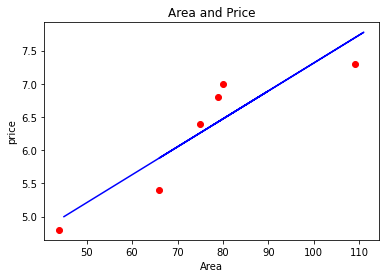

In [67]:
plt.scatter(test_x,test_y,color ='red')
plt.plot(train_x,regressor.predict(train_x),color = 'blue')
plt.title("Area and Price")
plt.xlabel("Area")
plt.ylabel("price")
plt.show()

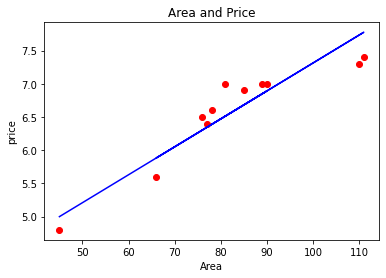

In [68]:
plt.scatter(train_x,train_y,color ='red')
plt.plot(train_x,regressor.predict(train_x),color = 'blue')
plt.title("Area and Price")
plt.xlabel("Area")
plt.ylabel("price")
plt.show()

In [69]:
pred_y_te = regressor.predict(test_x)

In [70]:
pred_y_te

array([[5.88359032],
       [6.47268529],
       [7.69295345],
       [6.26229423],
       [6.43060708],
       [4.95786965]])

In [71]:
pred_y_tr = regressor.predict(train_x)

In [72]:
pred_y_tr

array([[6.38852886],
       [6.89346741],
       [6.68307635],
       [5.88359032],
       [6.5147635 ],
       [7.73503166],
       [7.77710987],
       [6.8513892 ],
       [6.34645065],
       [6.30437244],
       [4.99994786]])

In [73]:
from sklearn.metrics import r2_score

In [74]:
r2_tr = r2_score(train_y,pred_y_tr)
r2_tr

0.8574626045434606

In [75]:
r2_ts = r2_score(test_y,pred_y_te)
r2_ts

0.8239161914351829